# Network Intrusion Detection using DNN

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

### Reading Data

In [3]:
#Add the column labels
feature=["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

### Fetching the files

In [4]:
train='KDDTrain+.txt'
test='KDDTest+.txt'
test21='KDDTest-21.txt'

train_data=pd.read_csv(train,names=feature)

In [5]:
train_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### Exploring Data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  object 
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
flag,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
src_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
dst_bytes,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
land,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
wrong_fragment,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
hot,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_failed_logins,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
logged_in,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_compromised,125973.0,0.001342,3.660284e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [8]:
# number of attack labels 
train_data['target'].value_counts()

21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: target, dtype: int64

### Redistribute across common attack class

In [9]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
  df.target.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)      
  df.target.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)
  df.target.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)

In [10]:
change_label(train_data)

In [11]:
# distribution of attack classes
train_data.target.value_counts()

21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: target, dtype: int64

### Creating Multi-class labels

In [12]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.target)

In [13]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [14]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,intrusion
0,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,0.216426,20
0,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,-1.965556,15
0,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,-0.219970,19
0,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,0.652823,21
0,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,0.652823,21


In [15]:
multi_data.drop(labels= ['target'], axis=1, inplace=True)
print(multi_data.shape)

(125973, 42)


In [16]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
print(multi_data.shape)

(125973, 3461)


In [17]:
y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 3460) 
y_train has shape: (125973, 1)


In [18]:
from sklearn.preprocessing import LabelBinarizer
y_train_multi = LabelBinarizer().fit_transform(y_train_multi)

In [19]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(100778, 3460) 
 (25195, 3460)


### Applying DNN Algorithms

In [23]:
mlp2 = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp2.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
mlp2.add(Dense(units=50, activation='relu'))
# output layer with softmax activation
mlp2.add(Dense(units=5,activation='softmax'))

In [24]:
# defining loss function, optimizer, metrics and then compiling model
mlp2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# summary of model layers
mlp2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                173050    
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 175,855
Trainable params: 175,855
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [26]:
# training the model on training dataset
history = mlp2.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [25]:
# predicting target attribute on testing dataset
test_results = mlp2.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

3088/3088 [==============================] - 15s 4ms/step - loss: 0.0034 - accuracy: 0.9995
Test results - Loss: 0.0034138571936637163 - Accuracy: 99.94736909866333%


### Plot of Accuracy

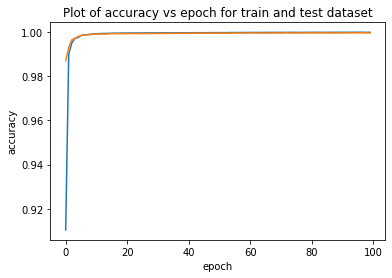

In [26]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Plot of loss

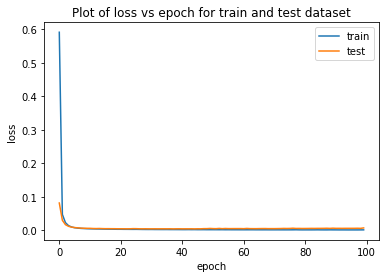

In [27]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()